In [27]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
img = cv2.imread('test.png', cv2.IMREAD_COLOR)
img = img.astype(np.float32) / 255
[height, width, _] = img.shape
FOV = 120
wFOV = 80
THETA = 0    #horizontal
PHI = 0       #vertical
hFOV =  60
h = 240
w = 320

w_len = np.tan(np.radians(wFOV / 2.0))
h_len = np.tan(np.radians(hFOV / 2.0))



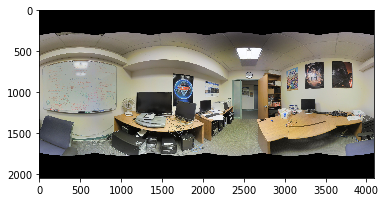

In [29]:
plt.imshow(img[:,:,[2,1,0]])
plt.show()

In [30]:
equ_h = height
equ_w = width
equ_cx = (equ_w - 1) / 2.0
equ_cy = (equ_h - 1) / 2.0

In [31]:
x_map = np.ones([h, w], np.float32)
y_map = np.tile(np.linspace(-w_len, w_len,w), [h,1])
z_map = -np.tile(np.linspace(-h_len, h_len,h), [w,1]).T


In [32]:
D = np.sqrt(x_map**2 + y_map**2 + z_map**2)
xyz = np.stack((x_map,y_map,z_map),axis=2)/np.repeat(D[:, :, np.newaxis], 3, axis=2)

In [33]:
y_axis = np.array([0.0, 1.0, 0.0], np.float32)
z_axis = np.array([0.0, 0.0, 1.0], np.float32)
[R1, _] = cv2.Rodrigues(z_axis * np.radians(THETA))
[R2, _] = cv2.Rodrigues(np.dot(R1, y_axis) * np.radians(-PHI))

In [34]:
xyz = xyz.reshape([h * w, 3]).T
xyz = np.dot(R1, xyz)
xyz = np.dot(R2, xyz).T
lat = np.arcsin(xyz[:, 2])
lon = np.arctan2(xyz[:, 1] , xyz[:, 0])

In [35]:
lon = lon.reshape([h, w]) / np.pi * 180
lat = -lat.reshape([h, w]) / np.pi * 180

In [36]:
lon = lon / 180 * equ_cx + equ_cx
lat = lat / 90  * equ_cy + equ_cy

In [37]:
persp = cv2.remap(img, lon.astype(np.float32), lat.astype(np.float32), cv2.INTER_CUBIC, borderMode=cv2.BORDER_WRAP)

In [38]:
persp_clone = persp.copy().astype(np.float32)

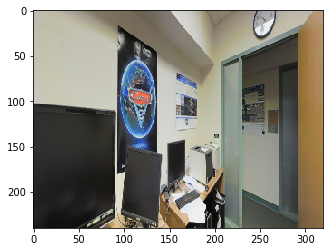

In [39]:
persp_int = persp * 255
plt.imshow(persp_int[:,:,[2,1,0]].astype(np.uint8))
plt.show()